# Статистический анализ данных. Проектная работа.

## Описание проекта:

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов:

### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

# План работы:

#### Шаг 1. Открыть и изучить доступные данные.

#### Шаг 2. Подготовить данные:
* Привести данные к нужным типам.
* Найти и исправить ошибки в данных, если они есть.

Посчитать для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### Шаг 3. Проанализировать данные.

#### Шаг 4. Проверить гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### Шаг 5. Общий вывод.


# Шаг 1. Открыть и изучить доступные данные.

Приступим к изучению данных, начнем с импорта нужных нам библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# для отображения в jupiter всех колонок df + сокращу количество цифр после запятой
pd.set_option('display.max_columns', None)
pd.set_option('display.precision',2)

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Так как предстоит множество однотипных действий по отношению к каждой таблице, придумаю функцию/цикл. Объединим название таблиц в словарь и выведем основные описательные методы.

In [3]:
df_list = {'calls':calls,'internet':internet,'messages':messages,'tariffs':tariffs,'users':users}
for df in df_list:
    print('_____________________')
    print('Данные по таблице: {}'.format(df))
    print('_____________________')
    print()
    print('Применяем метод .sample')
    display(df_list[df].sample(2))
    print('Применяем метод .info')
    display(df_list[df].info())
    print('Применяем метод .describe')
    display(df_list[df].describe(include= 'all'))
    print('Применяем метод .duplicated')
    display(df_list[df].duplicated().sum())
    

_____________________
Данные по таблице: calls
_____________________

Применяем метод .sample


,id,call_date,duration,user_id
200845,1495_232,2018-12-23,0.0,1495
20889,1055_382,2018-07-22,0.0,1055


Применяем метод .info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Применяем метод .describe


,id,call_date,duration,user_id
count,202607,202607,202607.00,202607.00
unique,202607,365,NaN,NaN
top,1068_299,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.76,1253.94
std,NaN,NaN,5.84,144.72
min,NaN,NaN,0.00,1000.00
25%,NaN,NaN,1.30,1126.00
50%,NaN,NaN,6.00,1260.00
75%,NaN,NaN,10.70,1379.00


Применяем метод .duplicated


0

_____________________
Данные по таблице: internet
_____________________

Применяем метод .sample


,id,mb_used,session_date,user_id
114021,1385_229,419.98,2018-08-21,1385
74425,1250_385,214.29,2018-05-30,1250


Применяем метод .info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

Применяем метод .describe


,id,mb_used,session_date,user_id
count,149396,149396.00,149396,149396.00
unique,149396,NaN,365,NaN
top,1282_62,NaN,2018-12-31,NaN
freq,1,NaN,1057,NaN
mean,NaN,370.19,NaN,1252.10
std,NaN,278.30,NaN,144.05
min,NaN,0.00,NaN,1000.00
25%,NaN,138.19,NaN,1130.00
50%,NaN,348.01,NaN,1251.00
75%,NaN,559.55,NaN,1380.00


Применяем метод .duplicated


0

_____________________
Данные по таблице: messages
_____________________

Применяем метод .sample


,id,message_date,user_id
1540,1004_594,2018-05-30,1004
67426,1285_614,2018-08-24,1285


Применяем метод .info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Применяем метод .describe


,id,message_date,user_id
count,123036,123036,123036.00
unique,123036,364,NaN
top,1282_62,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.99
std,NaN,NaN,143.52
min,NaN,NaN,1000.00
25%,NaN,NaN,1134.00
50%,NaN,NaN,1271.00
75%,NaN,NaN,1381.00


Применяем метод .duplicated


0

_____________________
Данные по таблице: tariffs
_____________________

Применяем метод .sample


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Применяем метод .info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Применяем метод .describe


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ultra
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.00,23040.00,1750.00,1250.00,175.00,2.00,2.00,NaN
std,671.75,10861.16,1767.77,989.95,35.36,1.41,1.41,NaN
min,50.00,15360.00,500.00,550.00,150.00,1.00,1.00,NaN
25%,287.50,19200.00,1125.00,900.00,162.50,1.50,1.50,NaN
50%,525.00,23040.00,1750.00,1250.00,175.00,2.00,2.00,NaN
75%,762.50,26880.00,2375.00,1600.00,187.50,2.50,2.50,NaN


Применяем метод .duplicated


0

_____________________
Данные по таблице: users
_____________________

Применяем метод .sample


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
242,1242,39,2018-12-21,Хабаровск,Радим,Федосеев,2018-11-18,smart
78,1078,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra


Применяем метод .info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Применяем метод .describe


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.00,500.00,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,1249.50,46.59,NaN,NaN,NaN,NaN,NaN,NaN
std,144.48,16.67,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.75,32.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,1249.50,46.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,1374.25,62.00,NaN,NaN,NaN,NaN,NaN,NaN


Применяем метод .duplicated


0

In [4]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

## Вывод

* `Calls`
Как было отмечено в задании, есть нулевые значения - пропущенный звонок. В следующем шаге необходимо избавить от этих записей, так как они будут размывать среднее значение длительности разговора, в то время как разговора и не было. Пропусков, в классичеком понимании - нет. Любопытное, но в тоже время очевидное наблюдение из анализа таблицы - в какой праздник люди звонят чаще всего? В Новый Год

* `Internet`
Присутствовал лишний столбец (Unnamed: 0), который дублирует индекс записи, нужно будет удалить на этапе чтения csv файла. Пропусков нет, но как и в случае со звонками есть сессии, в которых не было потрачено ни одного мб. Раз небыло потрачено, значит не было сессии. Такие сессии удалим, чтобы они не размывали среднеею

* `Messages`
Дублей и пропусков нет

* `Tarrifs`
В таблице указана стоимость за траты сверх тарифа, и тут вспоминается важный момент касательно типов данных. Нужно будет округлить количество потраченных минут и мб в calls & internet. Так как наша компания считает, например, 0.1 мб за 1 мб, а 30 сек. разговора за минуту.

* `Users`
Как и было заявлено в описании, пропуск есть в churn_date, трогать их не будем. Раз не ушел, значит не ушел) Клиенты из нашей выборки проживают в 76 городах, большая часть в Москве и у большинства тариф smart. Дублей нет. Кроме того, наблюдаем практически идентичное значение средней и медианы по возрасту.

Для каждой таблицы с данным по расходу минут/смс/трафика нужно будет добавить столбец с месяцем расхода. Для пользователей месяц регистрации и месяц ухода.

Отдельно отмечу, что максимальный и минимальный user_id по всем таблицам совпадает, следовательно считаю что у данные в таблицах содержат данные по интересующим нас клиентам.

# Шаг 2. Подготовка данных к анализу.

`Calls`

Начнем с удаления нулевой длительности разговора, округления этого параметра, сменой типа и добавление столбца с месяцем.

In [5]:
calls = calls.query('duration != 0')
calls.describe()

,duration,user_id
count,162994.00,162994.00
mean,8.40,1254.15
std,5.35,144.75
min,0.01,1000.00
25%,4.17,1126.00
50%,7.74,1261.00
75%,11.85,1379.00
max,38.00,1499.00


In [6]:
# округлим продолжительность разговора вверх до целого и проверим
calls['duration'] = calls['duration'].apply(np.ceil).astype('int64')
calls.describe()

,duration,user_id
count,162994.00,162994.00
mean,8.90,1254.15
std,5.35,144.75
min,1.00,1000.00
25%,5.00,1126.00
50%,8.00,1261.00
75%,12.00,1379.00
max,38.00,1499.00


In [7]:
# добавляю столбец с месяцем звонка
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.sample(3)

,id,call_date,duration,user_id,month
95406,1243_53,2018-10-02,15,1243,10
52058,1130_346,2018-05-13,10,1130,5
109964,1282_858,2018-07-09,1,1282,7


`Internet`



In [8]:
# уберем сессии без траты трафика
internet = internet.query('mb_used != 0')
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id


In [9]:
# добавим месяц сессии
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.sample(3)

,id,mb_used,session_date,user_id,month
147982,1495_184,538.16,2018-10-15,1495,10
38608,1135_88,118.10,2018-08-20,1135,8
66586,1227_183,888.32,2018-01-20,1227,1


`Messages`

Добавляю столбец с месяцем отправки смс.

In [10]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.sample(3)

,id,message_date,user_id,month
106510,1431_252,2018-05-29,1431,5
23165,1096_445,2018-10-20,1096,10
43596,1188_59,2018-05-07,1188,5


`Users`

Добавляю столбцы с месяцами подписания и расторжения контракта

In [11]:
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users.sample(8)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_month,reg_month
276,1276,30,NaN,Москва,Михаил,Крюков,2018-10-05,ultra,NaN,10
208,1208,69,NaN,Пермь,Ева,Сахарова,2018-03-24,ultra,NaN,3
227,1227,66,NaN,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart,NaN,1
432,1432,48,NaN,Улан-Удэ,Анвар,Кочетков,2018-08-04,smart,NaN,8
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,NaN,4
396,1396,23,NaN,Пенза,Эльга,Савельева,2018-01-12,ultra,NaN,1
11,1011,44,NaN,Самара,Веселина,Алёшко,2018-03-19,smart,NaN,3
68,1068,34,NaN,Москва,Ким,Демьянов,2018-07-16,smart,NaN,7


## Вывод
Проблем с данными оказалось немного, удалили пропущенные/несостоявшиеся звонки и интернет-сессии без затрат трафика, добавили пару столбцов для последующих более сложных расчетов, поменяли формат и округлили расход минут и интернет - трафика, теперь приступаем к следующему шагу.

# Шаг 3. Расчеты для каждого пользователя

Создадим новую таблицу, в которую поместим данные по потреблению наших пользователей и выручку компании с каждого клиента по месяцам

In [12]:
calls.sample()

,id,call_date,duration,user_id,month
34672,1086_221,2018-06-11,9,1086,6


In [13]:
calls_grouped = pd.pivot_table(calls, index=['user_id','month']
                               ,values=['duration','id']
                               , aggfunc={'duration':sum,'id':'count'}
                ).reset_index()
calls_grouped.rename(columns={'id':'calls_count','duration':'calls_duration'}, inplace=True)
calls_grouped.head()

,user_id,month,calls_duration,calls_count
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


In [14]:
# считаем количество смс
messages.sample()

,id,message_date,user_id,month
94803,1386_132,2018-11-16,1386,11


In [15]:
messages_grouped = pd.pivot_table(messages, index=['user_id','month']
                               ,values=['id']
                               , aggfunc='count'
                ).reset_index()
messages_grouped.rename(columns={'id':'messages_count'}, inplace=True)
messages_grouped.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [16]:
# считаем сумму трафика
internet.sample()

,id,mb_used,session_date,user_id,month
96693,1326_56,230.03,2018-11-06,1326,11


In [17]:
internet_grouped = pd.pivot_table(internet, index=['user_id','month']
                               ,values=['mb_used']
                               , aggfunc=sum
                ).reset_index()
internet_grouped.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Объединим полученные данные в одну таблицу, добавим тариф и город каждого пользователя, и заменим пропуски на 0. Так как пустое значение соответсвует нулевому потребленю смс/трафика/сообещний в конкретном месяце. Для дальнейшего анализатам понадобиться учитывать и нулевое потребление, например при расчете средней (ведь nan в расчете средней не участвует)

In [18]:
users_consumption = calls_grouped.merge(internet_grouped, on=['user_id','month'], how ='outer')
users_consumption = users_consumption.merge(messages_grouped, on=['user_id','month'], how ='outer')
users_consumption = users_consumption.merge(users[['user_id','tariff']], on=['user_id'], how ='left')
users_consumption = users_consumption.merge(users[['user_id','city']], on=['user_id'], how ='left')
users_consumption.fillna(0, inplace=True)
users_consumption.head(5)

,user_id,month,calls_duration,calls_count,mb_used,messages_count,tariff,city
0,1000,5,159.0,17.0,2253.49,22.0,ultra,Краснодар
1,1000,6,172.0,28.0,23233.77,60.0,ultra,Краснодар
2,1000,7,340.0,41.0,14003.64,75.0,ultra,Краснодар
3,1000,8,408.0,42.0,14055.93,81.0,ultra,Краснодар
4,1000,9,466.0,46.0,14568.91,57.0,ultra,Краснодар


In [19]:
users_consumption.reset_index(inplace=True)

Посчитаю доход от клиентов, сначала добавлю столбец с доходом от клиента, затем помесячную выручку с каждого клиента

In [20]:
# функция для расчета прибыли
def users_revenue(row):       
    tariff = tariffs.loc[tariffs['tariff_name'] == row['tariff']]
    # считаем сколько за месяц потратил пользователь исходя из его тарифа
    revenue = 0
    monthly_fee = tariff.iloc[0,3]
    revenue += monthly_fee
    # минуты 
    if row['calls_duration'] > tariff.iloc[0,2]:
        extra_minutes_cost = (row['calls_duration'] - tariff.iloc[0,2]) * tariff.iloc[0,-2]
        revenue += extra_minutes_cost
    # сообщения

    if row['messages_count'] > tariff.iloc[0,0]:
        extra_message_cost = (row['messages_count'] - tariff.iloc[0,0]) * tariff.iloc[0,-3]
        revenue += extra_message_cost
     
    # трафик
    if row['mb_used'] > tariff.iloc[0,1]:
        # так как клиент может докупать только гигабайты а не мб, рассчитаем сколько гб докупил пользовател
        # и исходя из этого рассчитаем стоимость доп трафика
        extra_gb_used = np.ceil((row['mb_used'] - tariff.iloc[0,1]) / 1024)
        extra_traffic_cost = extra_gb_used * tariff.iloc[0,-4]
        revenue += extra_traffic_cost

    return revenue

In [21]:
users_consumption['company_revenue'] = users_consumption.apply(users_revenue, axis=1)

In [22]:
# выведем несколько строк и проверим в ручную корректность расчетов 
users_consumption.sample(5)

,index,user_id,month,calls_duration,calls_count,mb_used,messages_count,tariff,city,company_revenue
919,919,1148,7,936.0,94.0,35124.89,20.0,ultra,Тольятти,2700.0
2735,2735,1430,7,322.0,35.0,21354.66,46.0,ultra,Тверь,1950.0
367,367,1057,10,960.0,105.0,14302.06,28.0,ultra,Москва,1950.0
746,746,1119,10,214.0,25.0,25838.86,61.0,smart,Петрозаводск,2783.0
3099,3099,1486,11,764.0,84.0,36266.11,96.0,smart,Нижний Новгород,5680.0


In [23]:
#  удалим лишний столбец index и поменяем формат на целочисленный
users_consumption.drop(axis='columns', labels=['index'], inplace=True)

In [24]:
columns_to_change_type=['calls_duration','calls_count','mb_used','messages_count','company_revenue']
users_consumption[columns_to_change_type] = users_consumption[columns_to_change_type].astype('int64')
users_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          3214 non-null   int64 
 1   month            3214 non-null   int64 
 2   calls_duration   3214 non-null   int64 
 3   calls_count      3214 non-null   int64 
 4   mb_used          3214 non-null   int64 
 5   messages_count   3214 non-null   int64 
 6   tariff           3214 non-null   object
 7   city             3214 non-null   object
 8   company_revenue  3214 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 226.1+ KB


In [25]:
users_consumption[['calls_duration','calls_count','mb_used','messages_count','company_revenue']]

,calls_duration,calls_count,mb_used,messages_count,company_revenue
0,159,17,2253,22,1950
1,172,28,23233,60,1950
2,340,41,14003,75,1950
3,408,42,14055,81,1950
4,466,46,14568,57,1950
...,...,...,...,...,...
3209,0,0,11050,17,550
3210,0,0,17206,32,950
3211,0,0,19559,21,1550
3212,0,0,17491,20,1150


In [26]:
# ручные расчеты подтвердили корректность работы функции
# оценим размер получившейся таблицы
users_consumption.shape

(3214, 9)

## Вывод
Посчитали количество звонков, сообщений и потраченных мб по месяцам для каждого клиента. Рассчитали выручку компании от каждого клиента по месяцам и удалил лишний звонок.

# Шаг 4. Анализ данных
Основная таблица для анализа users_consumption сформирована, приступим к её анализу. Построим boxplot-ы и изучим меры центральной тенденции (.describe), изученим значение минут разговора, сообщений и трафика. Поработаем с выбросами, чтобы в нашей выборке осталось только наиболее типичное поведение пользователей.

calls_duration       AxesSubplot(0.125,0.125;0.227941x0.755)
mb_used           AxesSubplot(0.398529,0.125;0.227941x0.755)
messages_count    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

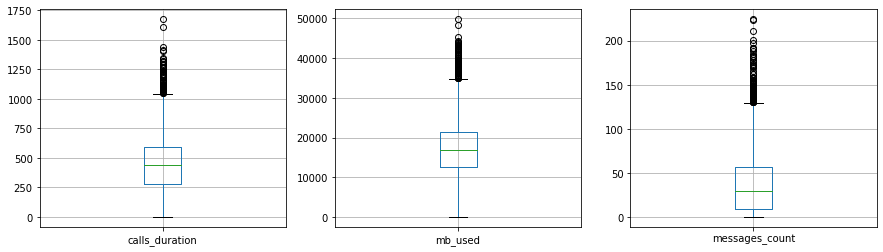

In [27]:
columns_list = ['calls_duration', 'mb_used', 'messages_count']
users_consumption[columns_list].plot(subplots=True, layout=(1, 3), 
                                    kind = 'box' 
                                   ,figsize=(15, 4)
                                   ,grid=True
                                      )

In [28]:
# рассчитаем границы для выбросов
for column in columns_list:
    print('------------------------\nДанные столбца {}\n------------------------'.format(column))
    q1=users_consumption[column].describe()[4]
    q3=users_consumption[column].describe()[6]
    iqr = q3 - q1
    top_edge = q3 + 1.5 * iqr
    print ('Верхняя граница {}'.format(top_edge))
    display(users_consumption[column].describe())

------------------------
Данные столбца calls_duration
------------------------
Верхняя граница 1049.5


count    3214.00
mean      451.24
std       241.91
min         0.00
25%       282.00
50%       443.00
75%       589.00
max      1673.00
Name: calls_duration, dtype: float64

------------------------
Данные столбца mb_used
------------------------
Верхняя граница 34823.125


count     3214.00
mean     17207.11
std       7570.96
min          0.00
25%      12491.25
50%      16942.50
75%      21424.00
max      49745.00
Name: mb_used, dtype: float64

------------------------
Данные столбца messages_count
------------------------
Верхняя граница 129.0


count    3214.00
mean       38.28
std        36.15
min         0.00
25%         9.00
50%        30.00
75%        57.00
max       224.00
Name: messages_count, dtype: float64

Отметим, что средняя и медиана по каждому столбцу находятся достаточно близко, после удаления выбросов станут еще ближе

Чтобы в нашей выборке остались наиболее типичные значения, уберем следующие значения

* `calls_duration` Считаем выбросами все что выше 1049 минут
* `mb_used` Считаем выбросами все что выше 34867 мб
* `messages_count` Считаем выбросами все что выше 129 сообщений

In [29]:
users_consumption_clean = users_consumption.query('calls_duration < 1049 and mb_used < 34867 and messages_count < 129')

calls_duration       AxesSubplot(0.125,0.125;0.227941x0.755)
mb_used           AxesSubplot(0.398529,0.125;0.227941x0.755)
messages_count    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

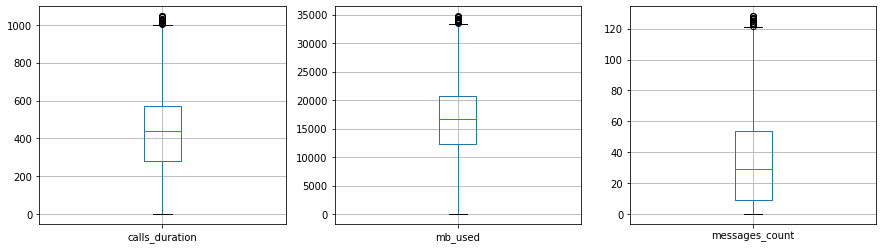

In [30]:
users_consumption_clean[columns_list].plot(subplots=True, layout=(1, 3), 
                                    kind = 'box' 
                                   ,figsize=(15, 4)
                                   ,grid=True
                                      )

In [31]:
# избавились от 206 строк с ярковыраженными выбросами + поменяем тип данных у анализируемых колонок
users_consumption_clean[columns_list] = users_consumption_clean[columns_list].astype('int64')
users_consumption.shape[0] - users_consumption_clean.shape[0]

206

In [32]:
users_consumption_summary_smart = pd.pivot_table(
    data=users_consumption_clean.loc[users_consumption_clean['tariff']=='smart'],
    index = 'month', values=columns_list , aggfunc=sum)
users_consumption_summary_smart

,calls_duration,mb_used,messages_count
month,,,
1,6931,289448,620
2,17324,672598,1397
3,30034,1162983,2453
4,41119,1507706,3443
5,54618,2228458,4762
6,64128,2564272,5344
7,81360,3144184,6647
8,98263,3879842,7771
9,110724,4215270,8610


In [33]:
 pd.pivot_table(data=users_consumption_clean.loc[users_consumption_clean['tariff']=='smart'],
    index = 'month', values='user_id' , aggfunc='count')

,user_id
month,
1,34
2,58
3,77
4,112
5,141
6,163
7,200
8,234
9,259


Действительно, у нас становится больше пользователей с каждым месяцем

Теперь рассчитаем среднюю, дисперсию и стандартное отклонение, но уже без группировки по месяцам.

Простым способом (describe) и чуть сложным.

In [34]:
users_consumption_clean_smart = users_consumption_clean.loc[users_consumption_clean['tariff']=='smart']

In [35]:
print('|Проверка с помощью .describe()|\n--------------------------------')
display(users_consumption_clean_smart.describe().astype('int64'))
print('|Ручная проверка|\n-----------------')
for column in columns_list:
    mean = round(users_consumption_clean_smart[column].mean(),ndigits=1)
    print('Среднее значение в столбце {} - {}'.format(column,mean))
    var = round(sum([(i - mean)**2 for i in users_consumption_clean_smart[column]]) / (len(users_consumption_clean_smart[column]) - 1),ndigits=1)
    print('Дисперсия в столбце {} - {}'.format(column,var))
    std = round(np.sqrt(var),ndigits=1)
    print('Стандартное отклонение в столбце {} - {}\n----------------'.format(column,std))    

|Проверка с помощью .describe()|
--------------------------------


,user_id,month,calls_duration,calls_count,mb_used,messages_count,company_revenue
count,2212,2212,2212,2212,2212,2212,2212
mean,1246,8,415,46,16112,32,1266
std,146,2,186,20,5756,27,769
min,1001,1,0,0,0,0,550
25%,1121,6,281,32,12615,10,550
50%,1239,9,420,47,16457,28,1012
75%,1376,11,543,61,19974,50,1750
max,1499,12,1022,109,33886,127,4664


|Ручная проверка|
-----------------
Среднее значение в столбце calls_duration - 415.0
Дисперсия в столбце calls_duration - 34946.9
Стандартное отклонение в столбце calls_duration - 186.9
----------------
Среднее значение в столбце mb_used - 16112.4
Дисперсия в столбце mb_used - 33136778.2
Стандартное отклонение в столбце mb_used - 5756.5
----------------
Среднее значение в столбце messages_count - 33.0
Дисперсия в столбце messages_count - 763.5
Стандартное отклонение в столбце messages_count - 27.6
----------------


Метод describe и ручная проверка выдают одинаковые значения. Средние значения для каждого месяца тарифа `smart` определены.

Расчитаем помесячное потребление минут/трафика/смс для ultra

Затем выведем статистические данные, на этот раз только с помощью метода describe.

In [36]:
users_consumption_summary_ultra = pd.pivot_table(
    data=users_consumption_clean.loc[users_consumption_clean['tariff']=='ultra'],
    index = 'month', values=columns_list , aggfunc=sum)
users_consumption_summary_ultra

,calls_duration,mb_used,messages_count
month,,,
1,3853,118263,304
2,7131,282610,527
3,13149,513603,741
4,22821,813361,1446
5,29244,1060482,2030
6,33770,1292630,2534
7,34729,1143313,2617
8,41478,1517158,3512
9,45351,1688649,3732


Теперь тариф ультра



In [37]:
users_consumption_clean_ultra = users_consumption_clean.loc[users_consumption_clean['tariff']=='ultra']

In [38]:
users_consumption_clean_ultra[columns_list].describe().astype('int64')

,calls_duration,mb_used,messages_count
count,796,796,796
mean,483,17441,39
std,266,8707,35
min,0,0,0
25%,280,10762,4
50%,497,17404,31
75%,683,23861,65
max,1045,34709,128


In [39]:
# посмотрим на различия тарифа смарт от ультра
for column in columns_list:
    mean_difference = round(users_consumption_clean_smart[column].describe()[1] - users_consumption_clean_ultra[column].describe()[1]
                            ,ndigits=1
                           )
    median_difference = round(users_consumption_clean_smart[column].describe()[5] - users_consumption_clean_ultra[column].describe()[5],
                             ndigits=1)
    print('Среднее значение {} тарифа smart отличается от  ultra на {}'.format(column, mean_difference))
    print('Медиана {} тарифа smart отличается от  ultra на {}\n____________________'.format(column, median_difference))

Среднее значение calls_duration тарифа smart отличается от  ultra на -68.3
Медиана calls_duration тарифа smart отличается от  ultra на -77.5
____________________
Среднее значение mb_used тарифа smart отличается от  ultra на -1329.2
Медиана mb_used тарифа smart отличается от  ultra на -947.0
____________________
Среднее значение messages_count тарифа smart отличается от  ultra на -6.2
Медиана messages_count тарифа smart отличается от  ultra на -3.0
____________________


tariff
smart    351
ultra    149
Name: tariff, dtype: int64

<AxesSubplot:title={'center':'Доля тарифов в выборке'}, ylabel='tariff'>

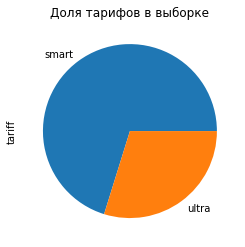

In [40]:
display(users.groupby('tariff')['tariff'].count())
users.groupby('tariff')['tariff'].count().plot(kind='pie',  title='Доля тарифов в выборке')

Пользователи тарифа ultra говорят в среднем на час дольше чем пользователя тарифа smart. Так же им, как правило, требуется больше трафика, в среднем потребление больше на +-1гб. В то время как разница в количестве сообщений почти не ощущается.

Общее потребление пользователей тарифа smart по всем статьям выше тарифа ultra. Как минимум потому, что таких пользователей у нас больше. Интересно будет узнать как обстоит ситуация с выручкой от этих тарифов.

Но прежде чем приступить к проверке гипотиз, посмотрим на распределение этих тарифов. Построим гистограммы плотности для каждого интересующего значения по каждому из тарифов.

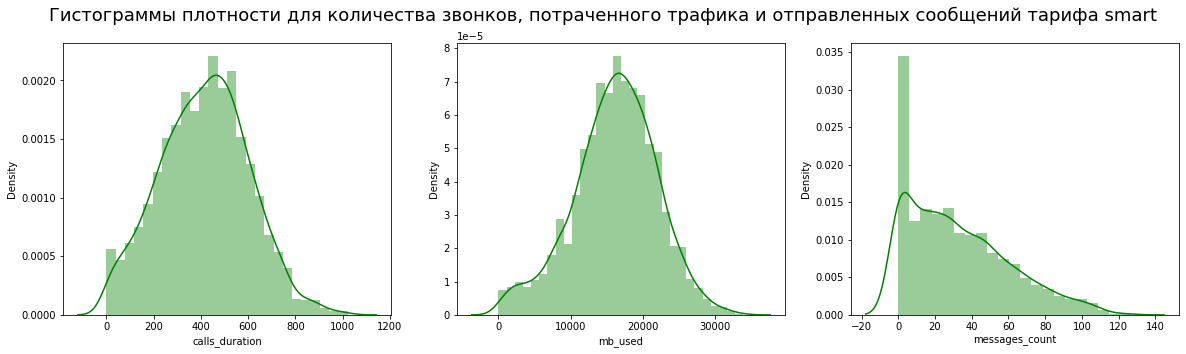

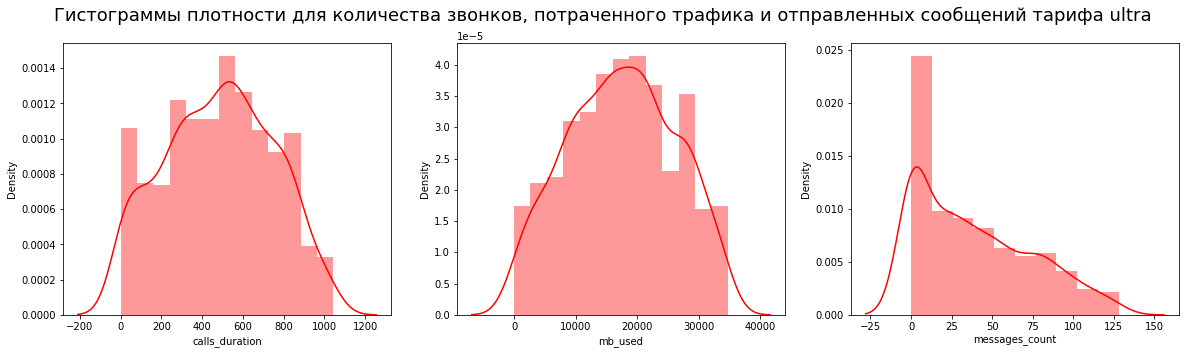

In [41]:
fig, axs = plt.subplots(1,3, figsize=[20,5])
fig.suptitle('Гистограммы плотности для количества звонков, потраченного трафика и отправленных сообщений тарифа smart',fontsize=18)
for i, column in enumerate(columns_list):
    sns.distplot(users_consumption_clean_smart[column], ax=axs[i], color='green')
    
plt.show()

fig, axs = plt.subplots(1,3, figsize=[20,5])
fig.suptitle('Гистограммы плотности для количества звонков, потраченного трафика и отправленных сообщений тарифа ultra',fontsize=18)
for i, column in enumerate(columns_list):
    sns.distplot(users_consumption_clean_ultra[column], ax=axs[i], color='red')

Выручка компании от каждого тарифа


tariff
smart    2802583
ultra    1570950
Name: company_revenue, dtype: int64

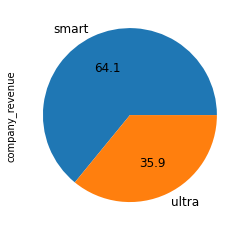

In [42]:
print('Выручка компании от каждого тарифа')
display(users_consumption_clean.groupby('tariff')['company_revenue'].sum().astype(int))
users_consumption_clean.groupby('tariff')['company_revenue']\
    .sum().plot.pie(autopct='%.1f', fontsize=12, figsize=(4, 4))
plt.show()

## Вывод
Распределения обоих тарифов имеют схожие формы. Клиенты ведут себя примерно одинаково. Для звонков и трафика график почти симметричный, немного скошен влево. Сообщения же ассиметричны ввиду того, что мало кто использует сообщения. Так как тариф ультра включает в себя больше минут/мб/сообщений видим, что их потребление в тарифе ультра больше, чем у смарт (колокол "шире").

# Шаг 5. Проверка гипотез

Приступим к проверке гипотиз и решим, какой же тариф лучше.

Первая - средняя выручка компании от пользователей тарифов «Ультра» и «Смарт» различается

Будем проверять две генеральные совокупности на равенство их средних (st.ttest_ind). Считаем, что первая ген совокупность это клиенты тарифа smart, вторая ultra. У нас больше 30 наблюдений в каждой выборке, соответственно можем применить t-критерий. Приступим к формулированию гипотиз исходя из поставленной задачи, держим в голове, что нулевая гипотеза всегда формируется со знаком равенства.

Гипотезы для статистического анализа:

`Н0` - средняя выручка компании от пользователей тарифов «Ультра» и «Смарт» одинаковая

`H1` - средняя выручка компании от пользователей тарифов «Ультра» и «Смарт» отличается
Уровень значимости зададим равным 5%

Прежде чем приступить, сравним дисперсии выборок (чтобы корректно выбрать значения аргумента `equal_var` метода `st.ttest_ind`.

In [43]:
ultra = users_consumption_clean.query("tariff == 'ultra'")
smart = users_consumption_clean.query("tariff == 'smart'")

In [44]:
print('Дисперсия выручки тарифа smart - {}'.format(int(smart['company_revenue'].describe()[2])**2))
print()
print('Дисперсия выручки тарифа ultra - {}'.format(int(ultra['company_revenue'].describe()[2])**2))

Дисперсия выручки тарифа smart - 591361

Дисперсия выручки тарифа ultra - 9801


Видим значительное отличие, в процессе проведения t-теста в методе пропишем equal_var=False.

Подготовка закончена, приступим к проверке первой гипотезы.

In [45]:
result = st.ttest_ind(smart['company_revenue'], ultra['company_revenue'], equal_var=False)
print('p-значение:', round(result.pvalue,ndigits=5))

p-значение: 0.0


p-уровень значимости получился очень очень маленьким, что свидетельствует о ничтожно малом шансе жизнеспособности нашей нулевой гипотизи при условии, что H0 верна. Тоже самое справедливо, задай мы уровень значимости 1%

Таким образом, Н0 отвергается, средняя выручка компании от тарифов Смарт и Ультра отличается.

In [46]:
print('Средняя вырочка компании от тарифа smart - {} руб'.format(round(smart['company_revenue'].describe()[1],ndigits=1)))
print('Вырочка компании от тарифа smart - {} руб'.format(smart['company_revenue'].sum()))
print()
print('Средняя вырочка компании от тарифа ultra - {} руб'.format(round(ultra['company_revenue'].describe()[1],ndigits=1)))
print('Вырочка компании от тарифа ultra - {} руб'.format(ultra['company_revenue'].sum()))

Средняя вырочка компании от тарифа smart - 1267.0 руб
Вырочка компании от тарифа smart - 2802583 руб

Средняя вырочка компании от тарифа ultra - 1973.6 руб
Вырочка компании от тарифа ultra - 1570950 руб


Средняя выручка компании от одного пользователя тарифа **ultra** больше, чем от **smart**. Кроме того, можно сделать вывод, что пользователи тариф **ultra**, в отличии от **smart**, укладываются в рамки своего тарифного плана и редко доплачивают за доп минуты/трафик/сообщения. Так как средняя выручка компании примерно равна стоимости пакета.

Суммарные же показатели указывают на то, что в нашей выборке больше клиентов с тарифом smart, тем не менее, около 35% процентов всей выручки составляет выручка от тарифа **ultra**.

Приступим к проверке второй гипотезы - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Тест проведем по аналогии с предыдущим, пользователи из Москвы одна ген совокупность, остальные - другая. Для этого наложим фильтры на таблицу users_consumption_clean, проверим равенство дисперсий и проверим гипотизу.

Гипотезы для статистического анализа:

`Н0` - средняя выручка компании в Москве равна выручке из других регионов

`H1` - средняя выручка компании в Москвы НЕ равна выручке из других регионов

Уровень значимости установим на уровне *5%*

In [47]:
moskow_revenue = users_consumption_clean.loc[users_consumption_clean['city']== 'Москва','company_revenue'] 
moskow_revenue.sample(3)

2538     550
2173    1950
1471    2121
Name: company_revenue, dtype: int64

In [48]:
regions_revenue = users_consumption_clean.loc[users_consumption_clean['city'] != 'Москва','company_revenue'] 
regions_revenue.sample(3)

2383    2400
1676    1150
227      750
Name: company_revenue, dtype: int64

In [49]:
print('Дисперсия выручки в Москве - {}'.format(int(moskow_revenue.describe()[2])**2))
print()
print('Дисперсия выручки в регионах - {}'.format(int(regions_revenue.describe()[2])**2))

Дисперсия выручки в Москве - 483025

Дисперсия выручки в регионах - 546121


In [50]:
# глазами получается не очевидно, поверим при помощи теста Левена, зададим уровень значимости 5%
stat, p = st.levene(moskow_revenue, regions_revenue)
print(p)

0.025255593644484205


p-значение теста Левена оказалось меньше 5%, значит отвергаем нулевую гипотезу о равенстве дисперсий наших выборок, устанавливаем `equal_var=False`

In [51]:
result = st.ttest_ind(moskow_revenue, regions_revenue, equal_var=False)
print('p-значение:', round(result.pvalue,ndigits=5))

p-значение: 0.42081


p-уровень значимости получился равен 40%, что не позволяет нам отвергнуть нулевую гипотизу.

Следовательно, выручка компании в Москве не отличается от выручки в регионах.

## Вывод
При помощи t-теста (так как выборки содержат > 30 наблюдений) для выборок из двух разных генеральных совокупностей было проверено две гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» 
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

*Первая гипотеза подтвердилась*, средняя выручка отличается, так же увидели, что средняя выручка тарифа ultra - больше. В тоже время, пользователи тарифа smart, как правило, докупают минуты/трафик/сообщения.

*Вторая гипотеза не подтвердилась*, нет разницы в выручке между Москвой и регионами

# Шаг 7. Общие выводы
В ходе анализа было изучено два тарифа телеком компании - `smart` & `ultra`. А именно:

* Качество данных оказалось на достаточно высоком уровне, большой предобработки не потребовалось. Самая большая ошибка была в таблице Internet, туда попал лишний столбец.
* Была подготовлена таблица с общим потреблением минут/трафика/сообщений для каждого пользователя в месяц, а так же рассчитана прибыль компании для каждого месяца.
* Из последующего анализа исключили месяца, в которых пользователи израсходовали слишком много минут/трафика/сообщений
* Распределение потребления минут и трафика нормальное, в то время как у сообщений сильно скошено вправо. Что указывает на не популярность СМС. Так же в процессе анализа выяснили, что в выборке больше клиентов с тарифом smart, что значительно сказывается на разнице потраченных минут/трафика/сообщений м/у тарифами.

Перспективный тариф: С большой долей вероятность было установлено, что средняя выручка у разных тарифов не равна, и средняя выручка от клиента тарифа ultra оказалась выше, чем у тарифа smart, 1973 рубля против 1271 рубля.

На данном этапе можно дать рекомендацию рассмотреть тариф ultra как наиболее перспективный.

С одним заменичанием, необходимо проанализировать расходы связанные с обслуживанием/маркетингом/содержанием инфраструктуры и т.п. Может оказаться, что на привлечение и обслуживание тарифа smart мы тратим на много меньше и учтя все затраты будет уже не так очевидно кто перспективней. Необходимо всесторонне рассчитать экономику тарифов, чтобы сделать однозначный вывод.

Важно отметить, что нет нужды концентрироваться только на Москве, так как не установлено значительного различие в выручке между Москвой и регионами.
